In [1]:
# import libraries and magics
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from PIL import Image
import cv2 # install opencv, if you don't already have it (https://pypi.org/project/opencv-python/)
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

# 1. Flower Classificaion

Define function for evaluating performance

In [2]:
def Evaluate_performance(model, name, X_test, t_test):
    # Prediction
    y_test = np.argmax(model.predict(X_test), axis=1)
    
    # Print performance
    print(f'{name} Performance:\n')
    print('Test set:')
    print(f'{classification_report(t_test, y_test)}')
    print(f'Accuracy: {accuracy_score(y_test, t_test)}')
    print('Confusion Matrix')
    print(confusion_matrix(t_test, y_test))

In [3]:
# load the data
X_test = np.load('data_test.npy').T
t_test = np.load('labels_test.npy')

class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids', 
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

# Scale the training data
X_test = X_test / 255.0
X_test = tf.constant(X_test.reshape((X_test.shape[0],300,300,3)),
                        dtype=tf.float16)

X_test.shape, t_test.shape

2023-11-25 00:10:53.768342: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 00:10:55.213015: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78911 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2023-11-25 00:10:55.214814: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78911 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:4e:00.0, compute capability: 8.0


(TensorShape([415, 300, 300, 3]), (415,))

ANN with 2 hidden layers model

In [4]:
model = keras.models.load_model('Model/ANN.h5')
Evaluate_performance(model=model, name='ANN model' , X_test=X_test, t_test=t_test)

ANN model Performance:

Test set:
              precision    recall  f1-score   support

         0.0       0.50      0.46      0.48        48
         1.0       0.71      0.73      0.72        44
         2.0       0.36      0.46      0.40        46
         3.0       0.73      0.75      0.74        36
         4.0       0.60      0.69      0.64        45
         5.0       0.67      0.65      0.66        40
         6.0       0.46      0.40      0.42        43
         7.0       0.57      0.62      0.60        37
         8.0       0.32      0.31      0.32        32
         9.0       0.50      0.36      0.42        44

    accuracy                           0.54       415
   macro avg       0.54      0.54      0.54       415
weighted avg       0.54      0.54      0.54       415

Accuracy: 0.5421686746987951
Confusion Matrix
[[22  0  1  0  3  0  9  3  8  2]
 [ 0 32  4  2  4  0  0  1  0  1]
 [ 4  3 21  1  4  3  3  1  2  4]
 [ 0  0  0 27  0  7  0  2  0  0]
 [ 1  2  5  0 31  0  1  0  0 

2023-11-25 00:11:02.269917: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Custom CNN model

In [5]:
model = keras.models.load_model('Model/CNN.h5')
Evaluate_performance(model=model, name='CNN model' , X_test=X_test, t_test=t_test)

2023-11-25 00:11:12.233173: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


CNN model Performance:

Test set:
              precision    recall  f1-score   support

         0.0       0.60      0.71      0.65        48
         1.0       0.76      0.84      0.80        44
         2.0       0.46      0.28      0.35        46
         3.0       0.73      0.89      0.80        36
         4.0       0.79      0.73      0.76        45
         5.0       0.77      0.57      0.66        40
         6.0       0.66      0.67      0.67        43
         7.0       0.65      0.84      0.73        37
         8.0       0.76      0.91      0.83        32
         9.0       0.60      0.48      0.53        44

    accuracy                           0.68       415
   macro avg       0.68      0.69      0.68       415
weighted avg       0.67      0.68      0.67       415

Accuracy: 0.6795180722891566
Confusion Matrix
[[34  2  2  0  1  0  6  2  1  0]
 [ 0 37  0  1  2  1  1  1  1  0]
 [ 6  4 13  3  1  1  4  8  0  6]
 [ 0  0  0 32  0  2  0  2  0  0]
 [ 1  2  3  0 33  0  0  0  0 

Transfer Learning with Xception model

In [6]:
model = keras.models.load_model('Model/TL.h5')
Evaluate_performance(model=model, name='Transfer learning model' , X_test=X_test, t_test=t_test)

Transfer learning model Performance:

Test set:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        48
         1.0       0.98      0.98      0.98        44
         2.0       0.90      0.93      0.91        46
         3.0       1.00      0.94      0.97        36
         4.0       0.95      0.89      0.92        45
         5.0       1.00      0.97      0.99        40
         6.0       0.95      0.98      0.97        43
         7.0       0.97      0.97      0.97        37
         8.0       0.89      0.97      0.93        32
         9.0       0.91      0.89      0.90        44

    accuracy                           0.94       415
   macro avg       0.95      0.95      0.95       415
weighted avg       0.95      0.94      0.94       415

Accuracy: 0.944578313253012
Confusion Matrix
[[45  0  0  0  0  0  0  1  0  2]
 [ 0 43  0  0  1  0  0  0  0  0]
 [ 0  0 43  0  1  0  2  0  0  0]
 [ 0  0  0 34  0  0  0  0  2  0]
 [ 1  1  3  0 40

# 2. Car Detection

In [2]:
# Load test data
bbox = pd.read_csv('test_bounding_boxes.csv')
N = len(bbox) # no. of training samples

# Create a numpy array with all images
for i in range(N): 
    filename='testing_images/'+bbox['image_name'][i]
    image = np.array(Image.open(filename))
    image_col = image.ravel()[:,np.newaxis]
    
    if i==0:
        X_test = image_col
    else:
        X_test = np.hstack((X_test, image_col))

X_test = X_test.T

# Test labels
t_test = bbox[['bbox_x','bbox_y', 'bbox_width', 'bbox_height']].round().to_numpy().astype(int)
t_test[:,2] = t_test[:,0] + t_test[:,2]
t_test[:,3] = t_test[:,1] + t_test[:,3]

(Nx,Ny,Nz) = image.shape

X_test = X_test / 255.0
X_test = tf.constant(X_test.reshape((X_test.shape[0], Nx,Ny,3)), dtype=tf.float16)

X_test.shape, t_test.shape

2023-11-24 13:23:25.417678: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-24 13:23:26.768590: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78921 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2023-11-24 13:23:26.771108: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78921 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:4e:00.0, compute capability: 8.0


(TensorShape([10, 380, 676, 3]), (10, 4))

In [3]:
model = keras.models.load_model('Model/VGG.h5')
y_test = model.predict(X_test)
y_test = np.vstack((y_test[:,0]*Ny, y_test[:,1]*Nx, y_test[:,2]*Ny, y_test[:,3]*Nx)).T
y_test = np.array(y_test, dtype='int')
y_test

2023-11-24 13:23:30.286435: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-11-24 13:23:31.020386: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2023-11-24 13:23:31.735906: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-24 13:23:31.737301: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-24 13:23:31.737315: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2023-11-24 13:23:31.738521: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-24 13:23:31.738564: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx co

array([[194, 181, 321, 244],
       [332, 178, 461, 229],
       [ 83, 188, 167, 232],
       [323, 174, 439, 231],
       [439, 181, 551, 237],
       [199, 176, 332, 239],
       [ 88, 190, 171, 238],
       [197, 178, 329, 236],
       [397, 182, 521, 235],
       [320, 184, 445, 232]])

**Discuss how you would validate performance in the test set given that no target labels are provided:**

Use the MakeSenseAI creating own test labels

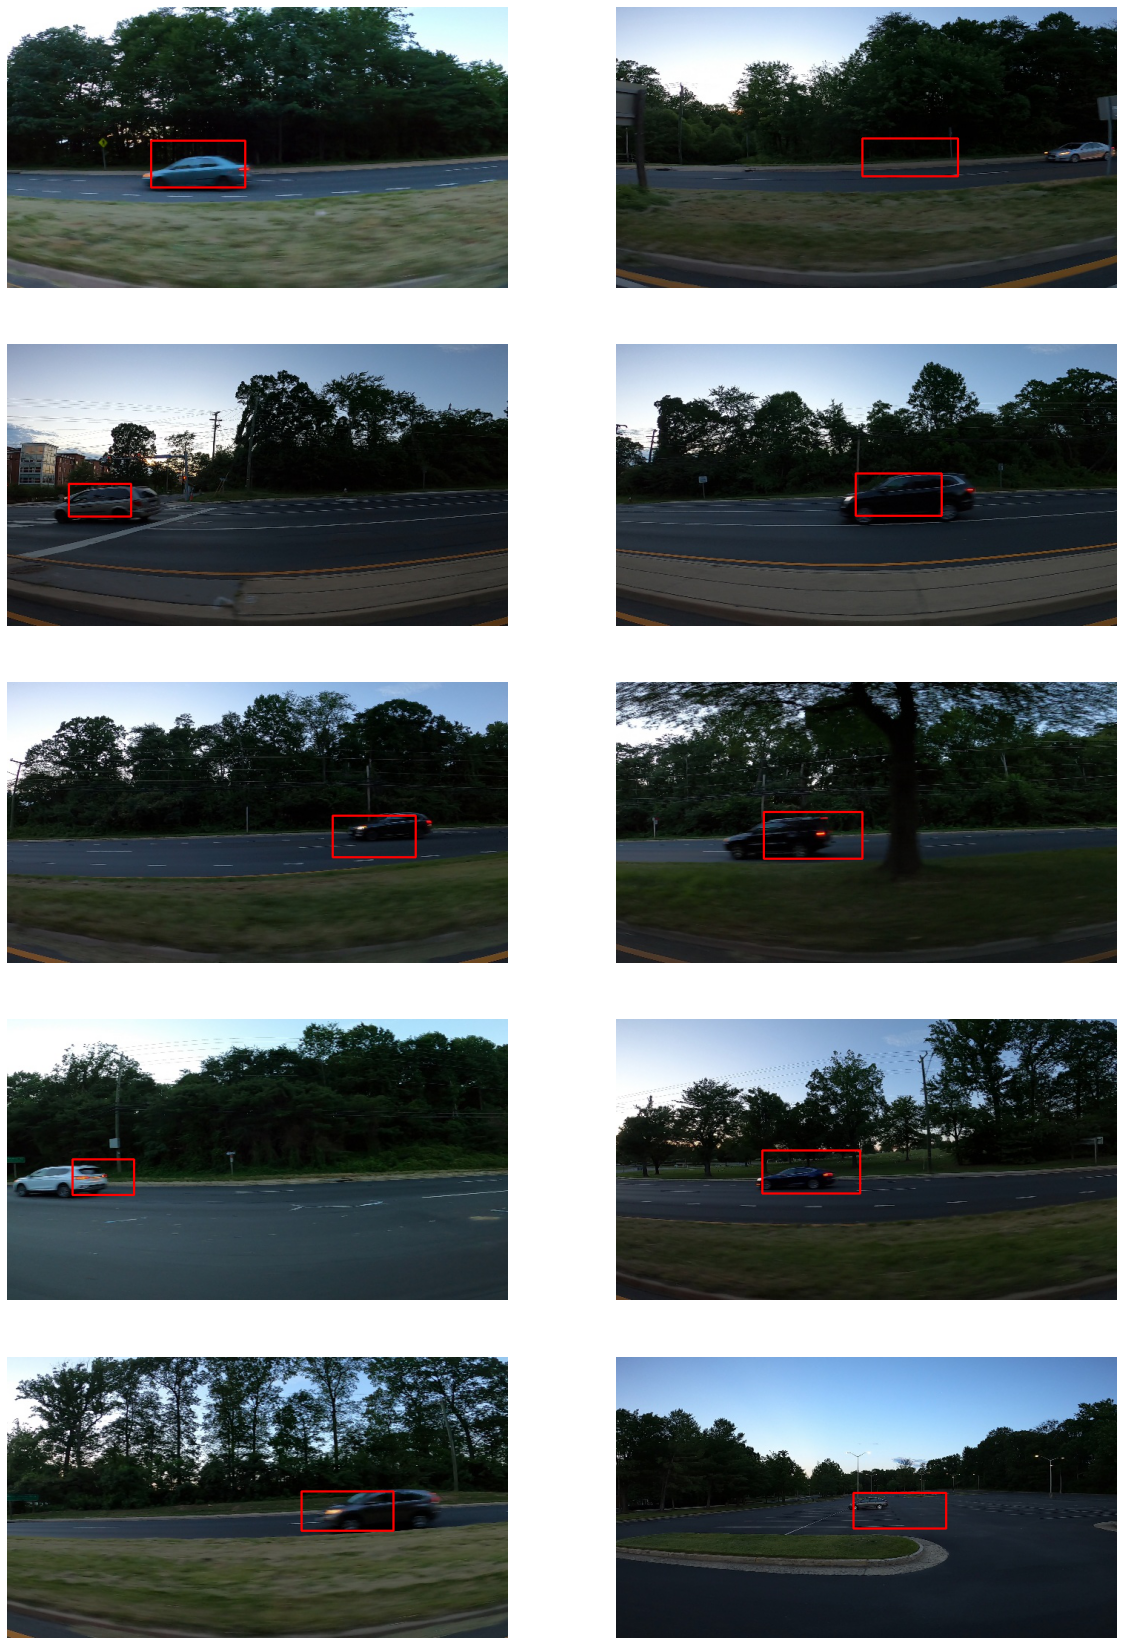

In [4]:
# Visualization of test result
plt.figure(figsize=(20,30))
for i in range(N):
    filename='testing_images/'+bbox['image_name'][i]
    image = np.array(Image.open(filename))
    
    plt.subplot(5,2,i+1)
    cv2.rectangle(image, (y_test[i,0], y_test[i,1]), (y_test[i,2], y_test[i,3]), (255, 0, 0), 2);
    plt.imshow(image)
    plt.axis('off')

Use ROI to validate performance.

In [5]:
# Define intersection over union function to validate the performance of the test dataset
def Region_of_Interest(box_1, box_2):
    # Assign value for coordinates in two boxes
    xmin_1 = box_1[0]
    ymin_1 = box_1[1]
    xmax_1 = box_1[2]
    ymax_1 = box_1[3]
    
    xmin_2 = box_2[0]
    ymin_2 = box_2[1]
    xmax_2 = box_2[2]
    ymax_2 = box_2[3]

    # Determine the coordinates of the overlapping region
    x1 = max(xmin_1, xmin_2)
    y1 = max(ymin_1, ymin_2)
    x2 = min(xmax_1, xmax_2)
    y2 = min(ymax_1, ymax_2)

    # Calculate the area of the the overlapping region (intersection)
    aoi = (x2 - x1 + 1) * (y2 - y1 + 1)

    # Calculate the area of both rectangles
    box_1_area = (xmax_1 - xmin_1 + 1) * (ymax_1 - ymin_1 + 1)
    box_2_area = (xmax_2 - xmin_2 + 1) * (xmax_2 - xmin_2 + 1)
    
    # Calculate the area of intersection divided by the sum both areas less the area of intersection
    roi = aoi / float(box_1_area)
    roi = max(0, roi)

    return roi

In [6]:
# Calculate ROI score of each image and their average
roi_score = []

for i in range(t_test.shape[0]):
    box_1 = t_test[i,:]
    box_2 = y_test[i,:]
    score = Region_of_Interest(box_1, box_2)
    roi_score.append(score)
    
print(roi_score)
print(f'Average ROI score: {sum(roi_score) / len(roi_score)}')

[0.6288737717309146, 0, 0.4093567251461988, 0.3979591836734694, 0.5967675093244923, 0.5506573181419807, 0.3460706560922855, 0.8623015873015873, 0.4721311475409836, 0.828125]
Average ROI score: 0.5092242898951913


**Discuss also how you would address the case where no car is present in the image:**

In scenarios where images have no cars, we have two approaches for training models. In the first approach, one model is dedicated to image classification, assessing whether a car is present. Upon a positive determination, a second model is activated to handle the specific task of car detection. Alternatively, in the second method, all images are trained collectively, and specific bounding box coordinates are assigned for images where no cars are present. For instance, a common practice is to set the label [0,0,0,0] for these particular images.